In [7]:
import requests, pandas as pd

CAT_URL = "https://datos.juntadeandalucia.es/api/v0/statistical-products/all?format=json"

resp = requests.get(CAT_URL, timeout=60)
resp.raise_for_status()
catalog = resp.json()
df_catalog = pd.json_normalize(catalog)

keywords = ["residuos", "energía", "circular", "trabajo", "emisiones", "medio ambiente", "reciclaje"]
mask = df_catalog["title"].str.contains("|".join(keywords), case=False, na=False)
df_filtered = df_catalog[mask].copy()

len(df_filtered), df_filtered[["id","title"]].head(10)


(24,
          id                                              title
 92    60449  Banco audiovisual de la Consejería de Medio Am...
 95    60982  Estadística sobre actividad económica y medio ...
 132   60323             Informe de Medio Ambiente en Andalucía
 137   60363  Estadística de tratamientos y trabajos selvíco...
 149   60432  Estadística de actuaciones efectuadas por los ...
 156   58854  Estadística de la Red de Viveros de la Conseje...
 159   59324  Estadística de gestión de residuos peligrosos ...
 164   59756  Informe mensual del trabajo autónomo en Andalucía
 165  278908     Estadística de gestión de residuos municipales
 171   61054  Caracterización del suministro de energía eléc...)

In [10]:
#descarga de datos de sostenibilidad
import io, zipfile, requests, pandas as pd
from pathlib import Path

RAW = Path("data/raw"); RAW.mkdir(parents=True, exist_ok=True)

ZIP_URL = "https://www.juntadeandalucia.es/institutodeestadisticaycartografia/dega/sites/default/files/datos/132-encuesta-social-consumo-y-sostenibilidad-microdatos-ESOC2023-CSV.zip"
r = requests.get(ZIP_URL, timeout=120); r.raise_for_status()

z = zipfile.ZipFile(io.BytesIO(r.content))
# inspeccionar contenidos
z.namelist()
# suele contener 1 CSV; extraemos a data/raw
z.extractall(RAW)

# localiza el CSV extraído (si no sabes el nombre exacto)
csv_files = [f for f in RAW.glob("*.csv")]
csv_files


[WindowsPath('data/raw/md_ESOC2023.csv')]

In [11]:
# si hay sólo uno:
csv_path = csv_files[0]
# lectura robusta (separador y codificación pueden variar)
try:
    df = pd.read_csv(csv_path)
except Exception:
    df = pd.read_csv(csv_path, sep=";", encoding="utf-8", engine="python")
df.shape, df.columns[:20]



((5255, 1),
 Index(['idp;"fep";"sexo";"edad";"nacionalidad";"cpro";"grurba";"compra1";"compra2";"compra3";"compra4";"compra5";"donde1";"donde2";"donde3";"donde4";"donde5";"como";"alides1";"alides2";"alides3";"alides4";"alides5";"alides6";"respalim";"acaract1";"acaract2";"acaract3";"acaract4";"acaract5";"acaract6";"acaract7";"fresco";"higiene1";"higiene2";"higiene3";"higiene4";"higiene5";"higiene6";"higiene7";"pimport1";"pimport2";"pimport3";"pimport4";"pimport5";"pimport6";"resphig";"rnueva";"rcaract1";"rcaract2";"rcaract3";"rcaract4";"rcaract5";"rcaract6";"rcaract7";"rdes";"rnousa";"resprop";"medida1";"medida2";"medida3";"medida4";"medida5";"medida6";"medida7";"medida8";"noreduce1";"noreduce2";"noreduce3";"noreduce4";"noreduce5";"co2";"realiza";"vdispo1";"vdispo2";"vdispo3";"vdispo4";"vdispo5";"aguso1";"aguso2";"aguso3";"aguso4";"mtrans1";"mtrans2";"mtrans3";"mtrans4";"mtrans5";"mtrans6";"mtrans7";"mtrans8";"mmotiv1";"mmotiv2";"mmotiv3";"mmotiv4";"mmotiv5";"mmotiv6";"mmotiv7";"mmotiv8

In [22]:
#leer el csv
import pandas as pd
from pathlib import Path

csv_file = Path("data/raw/md_ESOC2023.csv")  # pon aquí el nombre exacto

df = pd.read_csv(csv_file, sep=";", encoding="utf-8-sig", low_memory=False)

# Comprobamos tamaño y primeras columnas
df.shape, df.columns[:20].tolist()

((5255, 126),
 ['idp',
  'fep',
  'sexo',
  'edad',
  'nacionalidad',
  'cpro',
  'grurba',
  'compra1',
  'compra2',
  'compra3',
  'compra4',
  'compra5',
  'donde1',
  'donde2',
  'donde3',
  'donde4',
  'donde5',
  'como',
  'alides1',
  'alides2'])

In [24]:
import pandas as pd

# Lee el diccionario ya limpio
dicc = pd.read_excel("../data/raw/132-encuesta-social-consumo-y-sostenibilidad-diseno-registro-ESOC2023_limpio.xls")

dicc.head()

,Fuente,Nombre,TIPO,Tamaño,Posición inicial,Posición final,BLOQUE,Pregunta cuestionario,Descripción,Valores válidos
0,IDENTIFICACIÓN,idp,A,4.0,0.0,3.0,Bloque I,--,Código Identificativo de persona,1:5255
1,ESOC2023,fep,N,15.0,4.0,18.0,Bloque I,--,Factor de elevación de la persona,--
2,ESOC2023,sexo,A,1.0,19.0,19.0,Bloque I,--,Sexo,1=Hombre/6=Mujer
3,ESOC2023,edad,N,2.0,20.0,21.0,Bloque I,--,Edad,16:80
4,ESOC2023,nacionalidad,A,1.0,22.0,22.0,Bloque I,--,Nacionalidad,1=España/2=Resto de Europa/3=Fuera de Europa


In [25]:
map_vars = dicc.set_index("Nombre")["Descripción"].to_dict()

# Por ejemplo:
map_vars.get("respalim")


'¿Se encarga usted de la compra habitual de alimentos de su hogar?'

In [26]:
mask = dicc["Nombre"].str.contains(r"(respalim|medida|rnousa|resprop|rdes|resphig)", case=False, na=False)
vars_residuos = dicc[mask].copy()
vars_residuos

C:\Users\mdmg9\AppData\Local\Temp\ipykernel_64780\2238674804.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = dicc["Nombre"].str.contains(r"(respalim|medida|rnousa|resprop|rdes|resphig)", case=False, na=False)


,Fuente,Nombre,TIPO,Tamaño,Posición inicial,Posición final,BLOQUE,Pregunta cuestionario,Descripción,Valores válidos
27,ESOC2023,respalim,A,1.0,43.0,43.0,Bloque I,5,¿Se encarga usted de la compra habitual de ali...,1=Sí/2=No
52,ESOC2023,resphig,A,1.0,65.0,65.0,Bloque I,10,¿Se encarga usted de la compra habitual de pro...,1=Sí/2=No
62,ESOC2023,rdes,A,1.0,81.0,81.0,Bloque I,13,A la hora de deshacerse de su ropa lo hace por...,"1=Se ha deteriorado (rotura, desgaste, mancha,..."
63,ESOC2023,rnousa,A,1.0,82.0,82.0,Bloque I,14,"Y cuando se deshace de su ropa , usted suele…",1=Tirarla/2=Donarla a una asociación o institu...
64,ESOC2023,resprop,A,2.0,83.0,84.0,Bloque I,15,¿Se encarga usted de la compra de su ropa?,1=Sí/2=No/-9=No procede
66,ESOC2023,medida1,A,1.0,85.0,85.0,Bloque I,16.1,Dona/vende artículos para su reutilización,1=Sí/2=No
67,ESOC2023,medida2,A,1.0,86.0,86.0,Bloque I,16.2,Utiliza pilas recargables,1=Sí/2=No
68,ESOC2023,medida3,A,1.0,87.0,87.0,Bloque I,16.3,Lleva su propia bolsa o carro de la compra,1=Sí/2=No
69,ESOC2023,medida4,A,1.0,88.0,88.0,Bloque I,16.4,Evita los artículos de plástico y productos ex...,1=Sí/2=No
70,ESOC2023,medida5,A,1.0,89.0,89.0,Bloque I,16.5,Repara electrodomésticos y dispositivos electr...,1=Sí/2=No


In [28]:
df_lab = df.rename(columns={c: map_vars.get(c, c) for c in df.columns})

df_lab.head()

,Código Identificativo de persona,Factor de elevación de la persona,Sexo,Edad,Nacionalidad,Código provincia,Grado de urbanización,Compra productos de segunda mano,Compra exactamente lo que va a utilizar/consumir,Compra productos de origen local,...,Otros,"Nada, no cambiaría ningún hábito",¿Cuántas personas residen en el hogar? Incluyéndole a usted (pregunta abierta),¿Y cuántas de las personas que residen en el hogar tienen entre 16 y 80 años? Incluyéndole a usted (pregunta abierta),¿En qué tipo de hogar reside?,¿Cuáles son sus estudios terminados de más alto nivel?. Código de nivel de estudios (CNED-A-2014),"¿En qué situación de las siguientes se encuentra en la actualidad? (Si se encuentra en varias situaciones, indique solo la que considere principal)",¿Usted teletrabaja ?,"En su empleo principal o en su último empleo ¿cuál es/era la ocupación, profesión u oficio que desempeña/ba?. Clasificación de ocupación (CNO-2011)","Dígame en qué intervalo, de los que le leeré a continuación, se encuentran los ingresos mensuales netos del conjunto de miembros de su hogar"
0,1004,"1033,508414441",1,68,1,4,1,3,1,1,...,2,1,2,2,3,2,8,-9,-9,4
1,623,"1301,73050653336",1,38,1,4,1,2,1,1,...,2,2,3,3,5,3,1,3,7,6
2,2693,"1374,16584177058",1,24,1,4,1,2,2,1,...,2,2,4,4,2,5,6,-9,4,4
3,934,"1174,36277795332",1,51,1,4,1,3,1,1,...,2,2,4,3,5,2,99,-9,-9,99
4,4496,"1174,36277795332",1,54,1,4,1,2,1,3,...,2,2,6,4,4,7,1,2,3,6


In [31]:
!pip install eurostat

In [33]:
import eurostat
import pandas as pd

# Descargar dataset completo
df_env_wasmun = eurostat.get_data_df('env_wasmun', filter_pars={'unit':'KG_HAB'})

# Eurostat mete todas las dimensiones en una columna "indic_geo" por defecto
df_env_wasmun = eurostat.get_data_df('env_wasmun', flags=False)

# Convertir la columna de índices múltiples en columnas
df_env_wasmun = df_env_wasmun.reset_index()

df_env_wasmun.head()


,index,freq,wst_oper,unit,geo\TIME_PERIOD,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,0,A,DSP_I,KG_HAB,AL,NaN,NaN,NaN,NaN,NaN,...,13.0,12.0,14.0,7.0,9.0,1.0,0.0,0.0,0.0,0.0
1,1,A,DSP_I,KG_HAB,AT,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN
2,2,A,DSP_I,KG_HAB,BA,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,3,A,DSP_I,KG_HAB,BE,92.0,83.0,81.0,71.0,13.0,...,3.0,3.0,4.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0
4,4,A,DSP_I,KG_HAB,BG,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [34]:
df_env_wasmun = df_env_wasmun.rename(columns={"geo\\TIME_PERIOD": "geo"})
df_long = df_env_wasmun.melt(
    id_vars=["geo", "wst_oper", "unit"],
    var_name="year",
    value_name="value"
)

# limpiar
df_long["year"] = pd.to_numeric(df_long["year"], errors="coerce")
df_long = df_long.dropna(subset=["value"])

df_long.head()

,geo,wst_oper,unit,year,value
0,AL,DSP_I,KG_HAB,NaN,0
1,AT,DSP_I,KG_HAB,NaN,1
2,BA,DSP_I,KG_HAB,NaN,2
3,BE,DSP_I,KG_HAB,NaN,3
4,BG,DSP_I,KG_HAB,NaN,4


In [35]:
df_es_ue = df_long[
    (df_long["geo"].isin(["ES","EU27_2020"])) &
    (df_long["unit"]=="KG_HAB")
]

df_es_ue.head(10)

,geo,wst_oper,unit,year,value
12,ES,DSP_I,KG_HAB,NaN,12
13,EU27_2020,DSP_I,KG_HAB,NaN,13
88,ES,DSP_I_RCV_E,KG_HAB,NaN,88
89,EU27_2020,DSP_I_RCV_E,KG_HAB,NaN,89
164,ES,DSP_L_OTH,KG_HAB,NaN,164
165,EU27_2020,DSP_L_OTH,KG_HAB,NaN,165
240,ES,GEN,KG_HAB,NaN,240
241,EU27_2020,GEN,KG_HAB,NaN,241
370,ES,RCV_E,KG_HAB,NaN,370
371,EU27_2020,RCV_E,KG_HAB,NaN,371


In [36]:
from pathlib import Path

outdir = Path("data/external")
outdir.mkdir(parents=True, exist_ok=True)

df_es_ue.to_csv(outdir / "eurostat_env_wasmun_ES_UE.csv", index=False)

In [42]:
import eurostat
import pandas as pd
from pathlib import Path

# 1) Descargar dataset env_waspac
df_env_waspac = eurostat.get_data_df('env_waspac', flags=False).reset_index()

# Renombrar columna de país
if "geo\\TIME_PERIOD" in df_env_waspac.columns:
    df_env_waspac = df_env_waspac.rename(columns={"geo\\TIME_PERIOD": "geo"})

print(df_env_waspac.columns.tolist()[:15])  # 👀 para confirmar nombres

# 2) Pasar a formato largo
id_vars = [c for c in ["geo", "waste", "wst_oper", "unit"] if c in df_env_waspac.columns]

df_waspac_long = df_env_waspac.melt(
    id_vars=id_vars,
    var_name="year",
    value_name="value"
)

# 3) Limpiar
df_waspac_long["year"] = pd.to_numeric(df_waspac_long["year"], errors="coerce")
df_waspac_long = df_waspac_long.dropna(subset=["value"])

# 4) Filtrar España + UE27
df_waspac_es_ue = df_waspac_long[
    (df_waspac_long["geo"].isin(["ES","EU27_2020"])) &
    (df_waspac_long["unit"]=="PC")
]

# 5) Guardar
outdir = Path("data/external")
outdir.mkdir(parents=True, exist_ok=True)
df_waspac_es_ue.to_csv(outdir / "eurostat_env_waspac_ES_UE.csv", index=False)

df_waspac_es_ue.head()




['index', 'freq', 'waste', 'wst_oper', 'unit', 'geo', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005']


,geo,waste,wst_oper,unit,year,value
40,ES,W1501,GEN,PC,NaN,40
41,EU27_2020,W1501,GEN,PC,NaN,41
135,ES,W1501,RCV,PC,NaN,135
136,EU27_2020,W1501,RCV,PC,NaN,136
230,ES,W1501,RCV_E_PAC,PC,NaN,230


In [43]:
import eurostat
import pandas as pd
from pathlib import Path

# Descargar dataset
df_env_waspac = eurostat.get_data_df('env_waspac', flags=False).reset_index()

# Melt a formato largo
df_waspac_long = df_env_waspac.melt(
    id_vars=["geo", "waste", "wst_oper", "unit"],
    var_name="year",
    value_name="value"
)

# Convertir año
df_waspac_long["year"] = pd.to_numeric(df_waspac_long["year"], errors="coerce")
df_waspac_long = df_waspac_long.dropna(subset=["value"])

# Filtrar: España y UE, % de reciclaje total de envases
df_waspac_es_ue = df_waspac_long[
    (df_waspac_long["geo"].isin(["ES", "EU27_2020"])) &
    (df_waspac_long["unit"] == "PC") &
    (df_waspac_long["waste"] == "W1501") &   # total envases
    (df_waspac_long["wst_oper"] == "RCV")    # reciclaje
]

# Guardar
outdir = Path("data/external")
outdir.mkdir(parents=True, exist_ok=True)
df_waspac_es_ue.to_csv(outdir / "eurostat_env_waspac_ES_UE.csv", index=False)

df_waspac_es_ue.head(10)


KeyError: "The following 'id_vars' are not present in the DataFrame: ['geo']"

In [44]:
print(df_env_waspac.columns.tolist())
print(df_env_waspac.head())

['index', 'freq', 'waste', 'wst_oper', 'unit', 'geo\\TIME_PERIOD', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
   index freq  waste wst_oper    unit geo\TIME_PERIOD    1997    1998    1999  \
0      0    A  W1501      GEN  KG_HAB              AT  138.43  139.78  141.39   
1      1    A  W1501      GEN  KG_HAB              BE  133.20  139.80  144.51   
2      2    A  W1501      GEN  KG_HAB              BG     NaN     NaN     NaN   
3      3    A  W1501      GEN  KG_HAB              CY     NaN     NaN     NaN   
4      4    A  W1501      GEN  KG_HAB              CZ     NaN     NaN     NaN   

     2000  ...    2014    2015    2016    2017    2018    2019    2020  \
0  146.04  ...  152.52  151.72  153.46  156.52  159.90  161.89  157.34   
1  145.96  ...  155.40  155.32  157.13  156.55  157.51  160.62  167.28   
2     Na

In [45]:
import pandas as pd
import eurostat
from pathlib import Path

# 1) Descargar y resetear índices
df_env_waspac = eurostat.get_data_df('env_waspac', flags=False).reset_index()

# 2) Renombrar geo
df_env_waspac = df_env_waspac.rename(columns={"geo\\TIME_PERIOD": "geo"})

# 3) Identificar columnas de años
year_cols = [c for c in df_env_waspac.columns if str(c).isdigit()]

# 4) Melt: formato largo
df_waspac_long = df_env_waspac.melt(
    id_vars=["geo", "waste", "wst_oper", "unit"],
    value_vars=year_cols,
    var_name="year",
    value_name="value"
)

# 5) Limpiar año y valores
df_waspac_long["year"] = pd.to_numeric(df_waspac_long["year"], errors="coerce")
df_waspac_long = df_waspac_long.dropna(subset=["value"])

# 6) Filtrar: España y UE, reciclaje de envases (%)
df_waspac_es_ue = df_waspac_long[
    (df_waspac_long["geo"].isin(["ES", "EU27_2020"])) &
    (df_waspac_long["unit"] == "PC") &       # porcentaje
    (df_waspac_long["waste"] == "W1501") &   # total envases
    (df_waspac_long["wst_oper"] == "RCV")    # reciclaje
]

# 7) Guardar a CSV
outdir = Path("data/external")
outdir.mkdir(parents=True, exist_ok=True)
df_waspac_es_ue.to_csv(outdir / "eurostat_env_waspac_ES_UE.csv", index=False)

df_waspac_es_ue.head(10)


,geo,waste,wst_oper,unit,year,value
135,ES,W1501,RCV,PC,1997,37.5
8736,ES,W1501,RCV,PC,1998,37.3
17337,ES,W1501,RCV,PC,1999,41.9
25938,ES,W1501,RCV,PC,2000,44.2
34539,ES,W1501,RCV,PC,2001,49.7
43140,ES,W1501,RCV,PC,2002,49.8
51741,ES,W1501,RCV,PC,2003,48.3
60342,ES,W1501,RCV,PC,2004,53.0
68943,ES,W1501,RCV,PC,2005,56.1
68944,EU27_2020,W1501,RCV,PC,2005,67.7


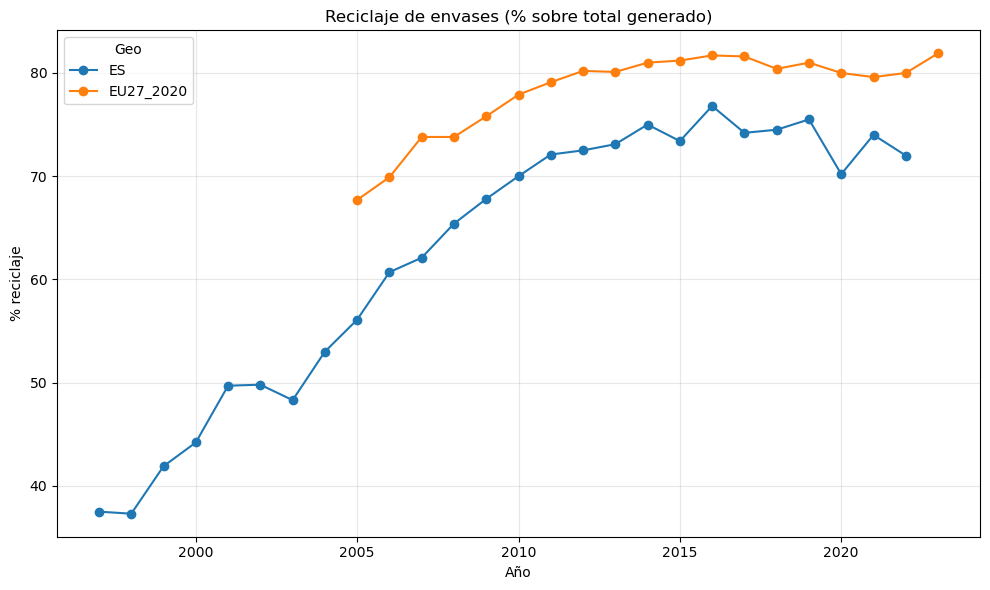

In [46]:
import matplotlib.pyplot as plt

# Filtrar ES y UE
df_plot = df_waspac_es_ue.copy()

plt.figure(figsize=(10,6))

for country in ["ES", "EU27_2020"]:
    subset = df_plot[df_plot["geo"] == country]
    plt.plot(subset["year"], subset["value"], marker="o", label=country)

plt.title("Reciclaje de envases (% sobre total generado)")
plt.xlabel("Año")
plt.ylabel("% reciclaje")
plt.legend(title="Geo")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


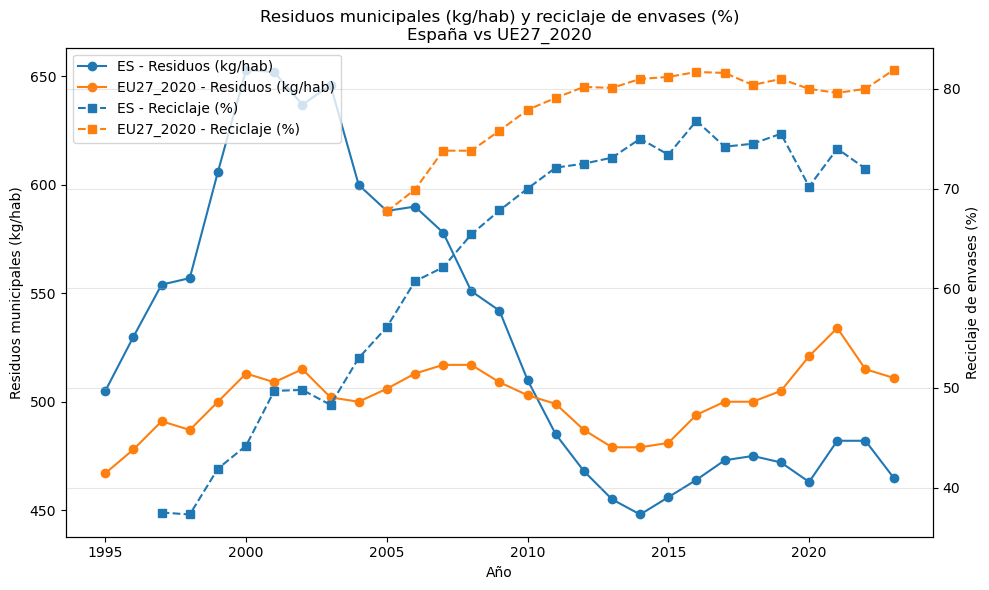

In [47]:
import matplotlib.pyplot as plt

# --- 1) Residuos municipales (kg/hab) ---
df_env_wasmun = eurostat.get_data_df('env_wasmun', flags=False).reset_index()
df_env_wasmun = df_env_wasmun.rename(columns={"geo\\TIME_PERIOD": "geo"})
year_cols = [c for c in df_env_wasmun.columns if str(c).isdigit()]
df_wasmun_long = df_env_wasmun.melt(
    id_vars=["geo", "wst_oper", "unit"],
    value_vars=year_cols,
    var_name="year",
    value_name="value"
)
df_wasmun_long["year"] = pd.to_numeric(df_wasmun_long["year"], errors="coerce")
df_wasmun_long = df_wasmun_long.dropna(subset=["value"])
df_wasmun_es_ue = df_wasmun_long[
    (df_wasmun_long["geo"].isin(["ES", "EU27_2020"])) &
    (df_wasmun_long["unit"] == "KG_HAB") &
    (df_wasmun_long["wst_oper"] == "GEN")
]

# --- 2) Reciclaje de envases (%) ---
# (df_waspac_es_ue ya lo tienes cargado en tu notebook)

# --- 3) Graficar ---
fig, ax1 = plt.subplots(figsize=(10,6))

# Escala 1: residuos municipales (kg/hab)
for country in ["ES", "EU27_2020"]:
    subset = df_wasmun_es_ue[df_wasmun_es_ue["geo"] == country]
    ax1.plot(subset["year"], subset["value"], marker="o", label=f"{country} - Residuos (kg/hab)")
ax1.set_ylabel("Residuos municipales (kg/hab)")
ax1.set_xlabel("Año")

# Escala 2: reciclaje de envases (%)
ax2 = ax1.twinx()
for country in ["ES", "EU27_2020"]:
    subset = df_waspac_es_ue[df_waspac_es_ue["geo"] == country]
    ax2.plot(subset["year"], subset["value"], marker="s", linestyle="--", label=f"{country} - Reciclaje (%)")
ax2.set_ylabel("Reciclaje de envases (%)")

# Leyenda combinada
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.title("Residuos municipales (kg/hab) y reciclaje de envases (%)\nEspaña vs UE27_2020")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [48]:
from pathlib import Path

# --- 1) Preparar residuos municipales (kg/hab) ---
df_residuos = df_wasmun_es_ue[["geo", "year", "value"]].rename(columns={"value": "residuos_kg_hab"})

# --- 2) Preparar reciclaje de envases (%) ---
df_reciclaje = df_waspac_es_ue[["geo", "year", "value"]].rename(columns={"value": "reciclaje_pct"})

# --- 3) Unir ambos datasets por geo + year ---
df_comb = pd.merge(df_residuos, df_reciclaje, on=["geo", "year"], how="outer")

# --- 4) Ordenar ---
df_comb = df_comb.sort_values(["geo", "year"]).reset_index(drop=True)

# --- 5) Guardar ---
outdir = Path("data/processed")
outdir.mkdir(parents=True, exist_ok=True)
df_comb.to_csv(outdir / "es_ue_residuos_reciclaje.csv", index=False)

df_comb.head(15)


,geo,year,residuos_kg_hab,reciclaje_pct
0,ES,1995,505.0,NaN
1,ES,1996,530.0,NaN
2,ES,1997,554.0,37.5
3,ES,1998,557.0,37.3
4,ES,1999,606.0,41.9
5,ES,2000,653.0,44.2
6,ES,2001,652.0,49.7
7,ES,2002,637.0,49.8
8,ES,2003,646.0,48.3
9,ES,2004,600.0,53.0
